In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as colormap
import numpy as np
np.random.seed(1)

from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
#rc('mathtext',**{'default':'regular'})
#%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_acc(accdict):
    figure = plt.gcf()
    figure.set_size_inches(12, 6)
    ax = plt.subplot()
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    if len(accdict)==2:
        colors = ['blue','red']
        lines = ['-','-']
        markers = ['o','^']
    else:
        colors = ['blue','blue','red','red']
        lines = ['-','--','-','--']
        markers = ['o','o','^','^']
    for index in accdict.keys():
        color=colors[index]
        line=lines[index]
        marker= markers[index]
        plt.plot(accdict[index].values()[0], label=accdict[index].keys()[0], color=color, marker=marker, linestyle=line, linewidth=1.0)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0.95,1.0))
    plt.legend()
    box = ax.get_position()
    ax.legend(loc='lower right')
    #plt.tight_layout()
    
    spacing = 1
    minorLocator = MultipleLocator(spacing)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.grid(which = 'minor')
    plt.xticks(np.arange(0, 10, 1.0))
    
    plt.grid(True)
    plt.show()

In [3]:
accdict = {}

DCNNacc = [0.9820, 0.9830, 0.9883, 0.9882, 0.9829, 0.9893, 0.9860, 0.9882, 0.9870, 0.9870]
GISTacc = [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.9710, 0.9817, 0.9805, 0.9762]

accdict = {0: {'DCNN': DCNNacc},
           1: {'GIST kNN (k=4)': GISTacc}}

In [4]:
for i in accdict.keys():
    print(accdict[i])

{'DCNN': [0.982, 0.983, 0.9883, 0.9882, 0.9829, 0.9893, 0.986, 0.9882, 0.987, 0.987]}
{'GIST kNN (k=4)': [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.971, 0.9817, 0.9805, 0.9762]}


In [5]:
for i in accdict.keys():
    print("%s average: %.4f (+-%.4f)" %(accdict[i].keys()[0],np.mean(accdict[i].values()[0]),np.std(accdict[i].values()[0])))

DCNN average: 0.9862 (+-0.0025)
GIST kNN (k=4) average: 0.9748 (+-0.0039)


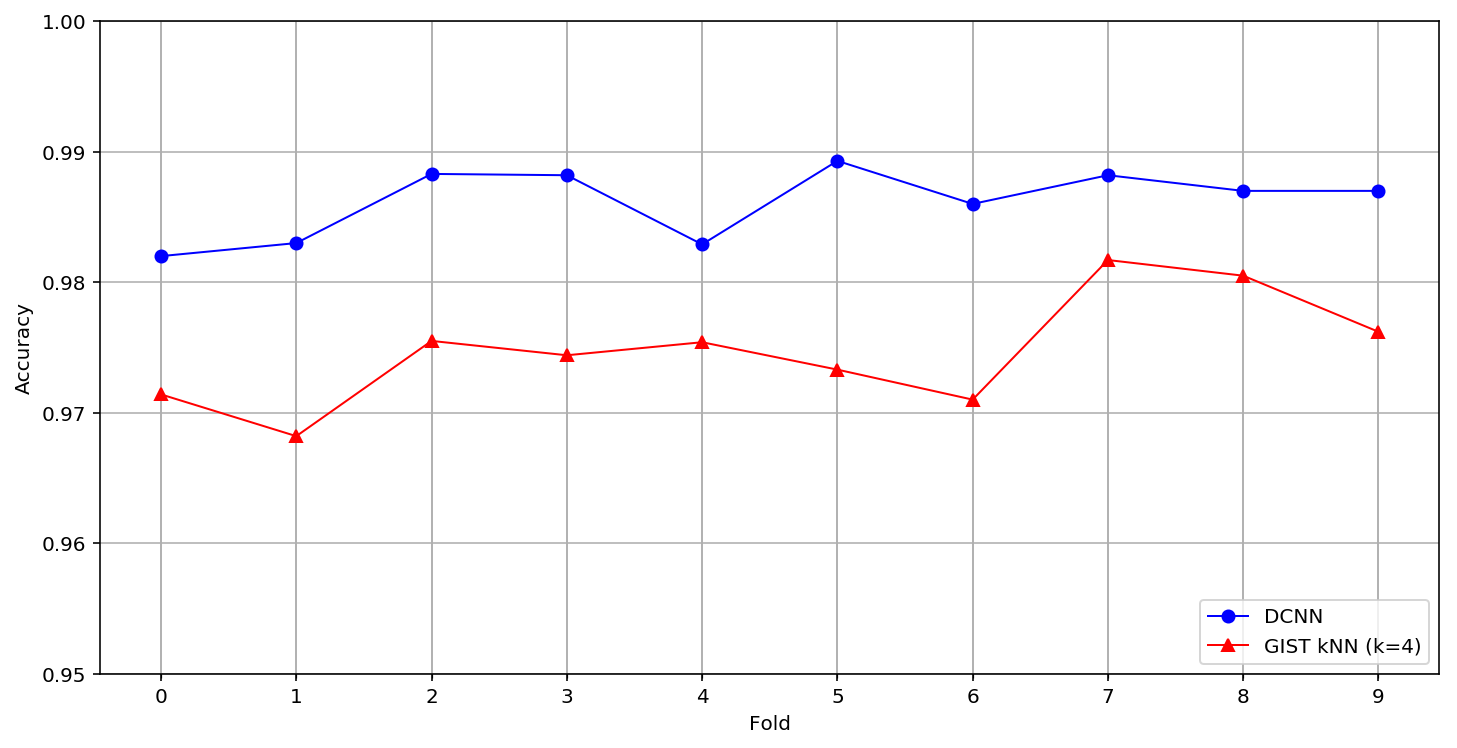

In [6]:
plot_acc(accdict)

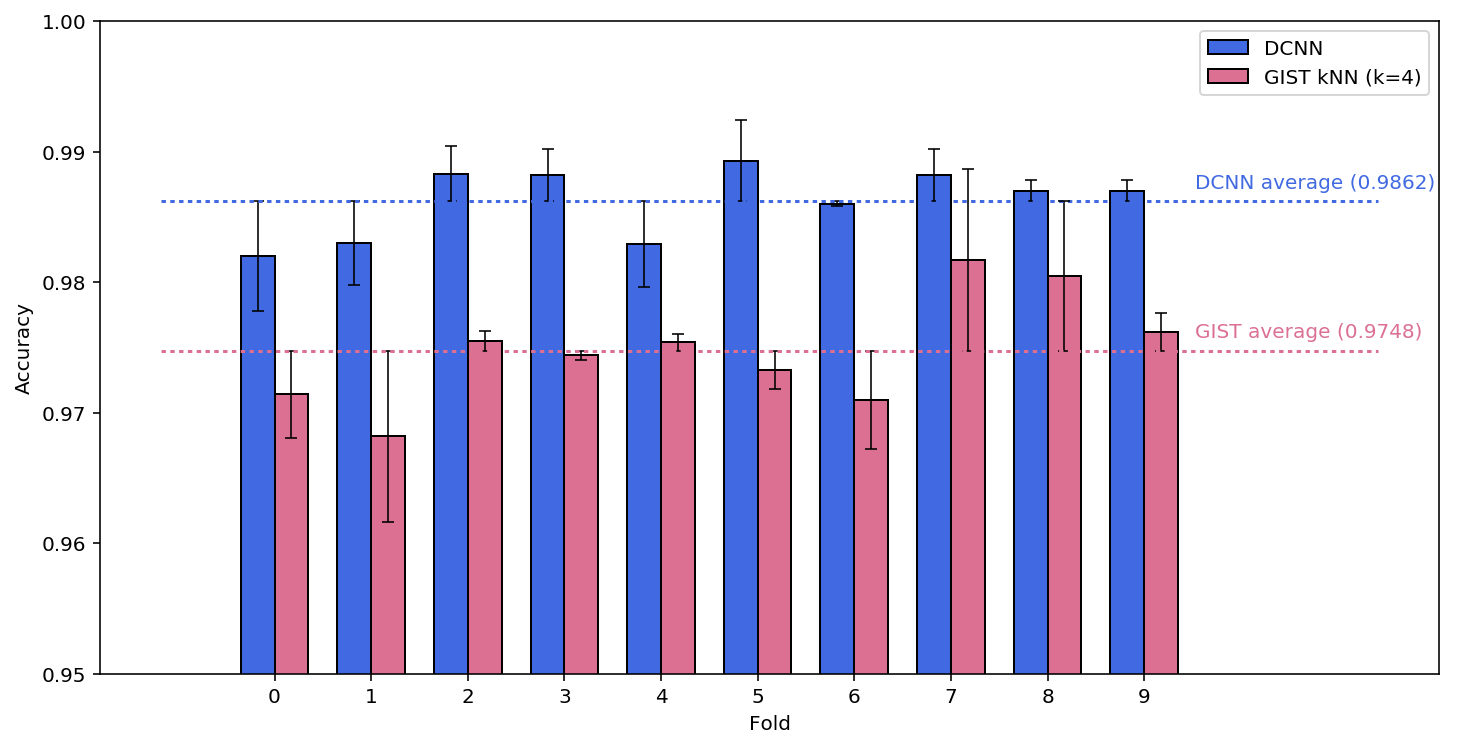

In [7]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax = plt.subplot()
error_kw = {'capsize': 3, 'capthick': 0.8, 'ecolor': 'black', 'lw' : 0.8}
lstart = -1
lend = 11.6
ls = ":"

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

DCNNstd = np.absolute(np.array(DCNNacc)-np.mean(DCNNacc))
rects1 = ax.bar(ind, DCNNacc, width, color='royalblue', edgecolor='black', yerr=DCNNstd, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(DCNNacc),np.mean(DCNNacc)], color='royalblue', linestyle=ls)
plt.text(lend-1.9, np.mean(DCNNacc)+0.001, 'DCNN average (%.4f)' %(np.mean(DCNNacc)), color='royalblue')

GISTstd = np.absolute(np.array(GISTacc)-np.mean(GISTacc))
rects2 = ax.bar(ind + width, GISTacc, width, color='palevioletred', edgecolor='black', yerr=GISTstd, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(GISTacc),np.mean(GISTacc)], color='palevioletred', linestyle=ls)
plt.text(lend-1.9, np.mean(GISTacc)+0.001, 'GIST average (%.4f)' %(np.mean(GISTacc)), color='palevioletred')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Fold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ind)

ax.legend((rects1[0], rects2[0]), ('DCNN', 'GIST kNN (k=4)'))

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.95,1.0))
plt.show()

In [8]:
accdict2 = {}

DCNNkNNk3acc = [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]
DCNNkNNk4acc = [0.9757, 0.9756, 0.9765, 0.9818, 0.9850, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]
GISTkNNk3acc = [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]
GISTkNNk4acc = [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.9710, 0.9817, 0.9805, 0.9762]

accdict2 = {0: {'BF kNN (k=3)': DCNNkNNk3acc},
            1: {'BF kNN (k=4)': DCNNkNNk4acc},
            2: {'GIST kNN (k=3)': GISTkNNk3acc},
            3: {'GIST kNN (k=4)': GISTkNNk4acc}}

In [9]:
for i in accdict2.keys():
    print(accdict2[i])

{'BF kNN (k=3)': [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]}
{'BF kNN (k=4)': [0.9757, 0.9756, 0.9765, 0.9818, 0.985, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]}
{'GIST kNN (k=3)': [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]}
{'GIST kNN (k=4)': [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.971, 0.9817, 0.9805, 0.9762]}


In [10]:
for i in accdict2.keys():
    print("%s average: %.4f (+-%.4f)" %(accdict2[i].keys()[0],np.mean(accdict2[i].values()[0]),np.std(accdict2[i].values()[0])))

BF kNN (k=3) average: 0.9806 (+-0.0031)
BF kNN (k=4) average: 0.9800 (+-0.0032)
GIST kNN (k=3) average: 0.9744 (+-0.0038)
GIST kNN (k=4) average: 0.9748 (+-0.0039)


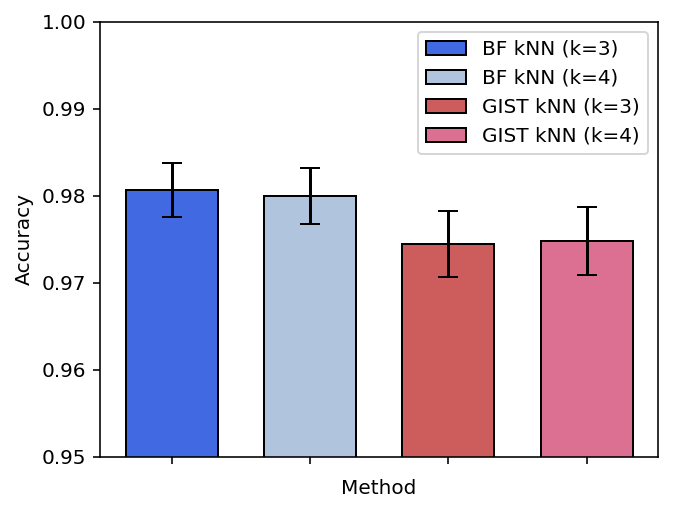

In [11]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
ax = plt.subplot()
error_kw = {'capsize': 5, 'capthick': 1, 'ecolor': 'black'}

N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.1       # the width of the bars

DCNNkNNk3mean = np.mean(DCNNkNNk3acc)
DCNNkNNk3std = np.std(DCNNkNNk3acc)
rects1 = ax.bar(ind, DCNNkNNk3mean, width, color='royalblue', edgecolor='black', yerr=DCNNkNNk3std, error_kw=error_kw)

DCNNkNNk4mean = np.mean(DCNNkNNk4acc)
DCNNkNNk4std = np.std(DCNNkNNk4acc)
rects2 = ax.bar(ind+1.5*width, DCNNkNNk4mean, width, color='lightsteelblue', edgecolor='black', yerr=DCNNkNNk4std, error_kw=error_kw)

GISTkNNk3mean = np.mean(GISTkNNk3acc)
GISTkNNk3std = np.std(GISTkNNk3acc)
rects3 = ax.bar(ind+3*width, GISTkNNk3mean, width, color='indianred', edgecolor='black', yerr=GISTkNNk3std, error_kw=error_kw)

GISTkNNk4mean = np.mean(GISTkNNk4acc)
GISTkNNk4std = np.std(GISTkNNk4acc)
rects4 = ax.bar(ind+4.5*width, GISTkNNk4mean, width, color='palevioletred', edgecolor='black', yerr=GISTkNNk4std, error_kw=error_kw)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Method')
ax.set_xticks([ind, ind+1.5*width, ind+3*width, ind+4.5*width])
ax.set_xticklabels([])

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), [accdict2[index].keys()[0] for index in accdict2.keys()])
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.95,1.0))
plt.show()

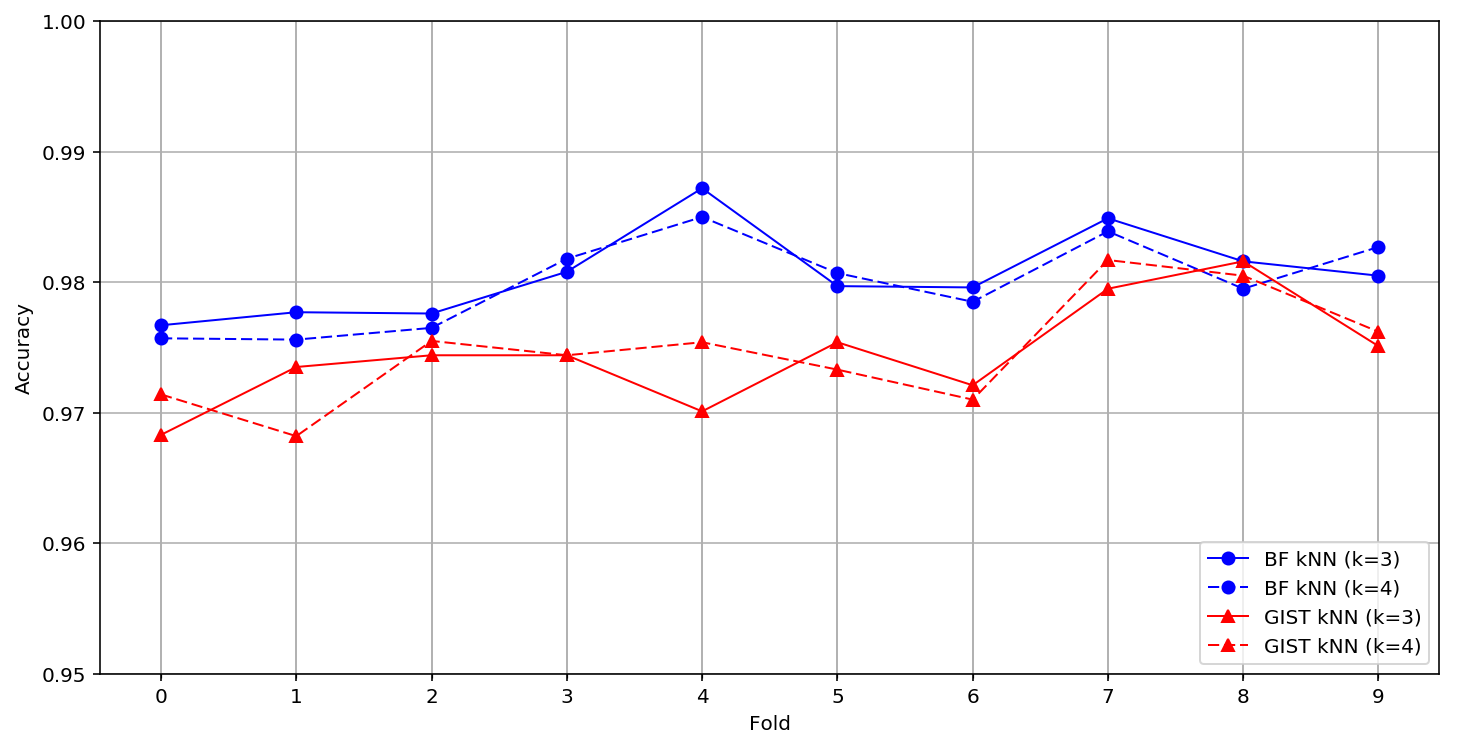

In [12]:
plot_acc(accdict2)

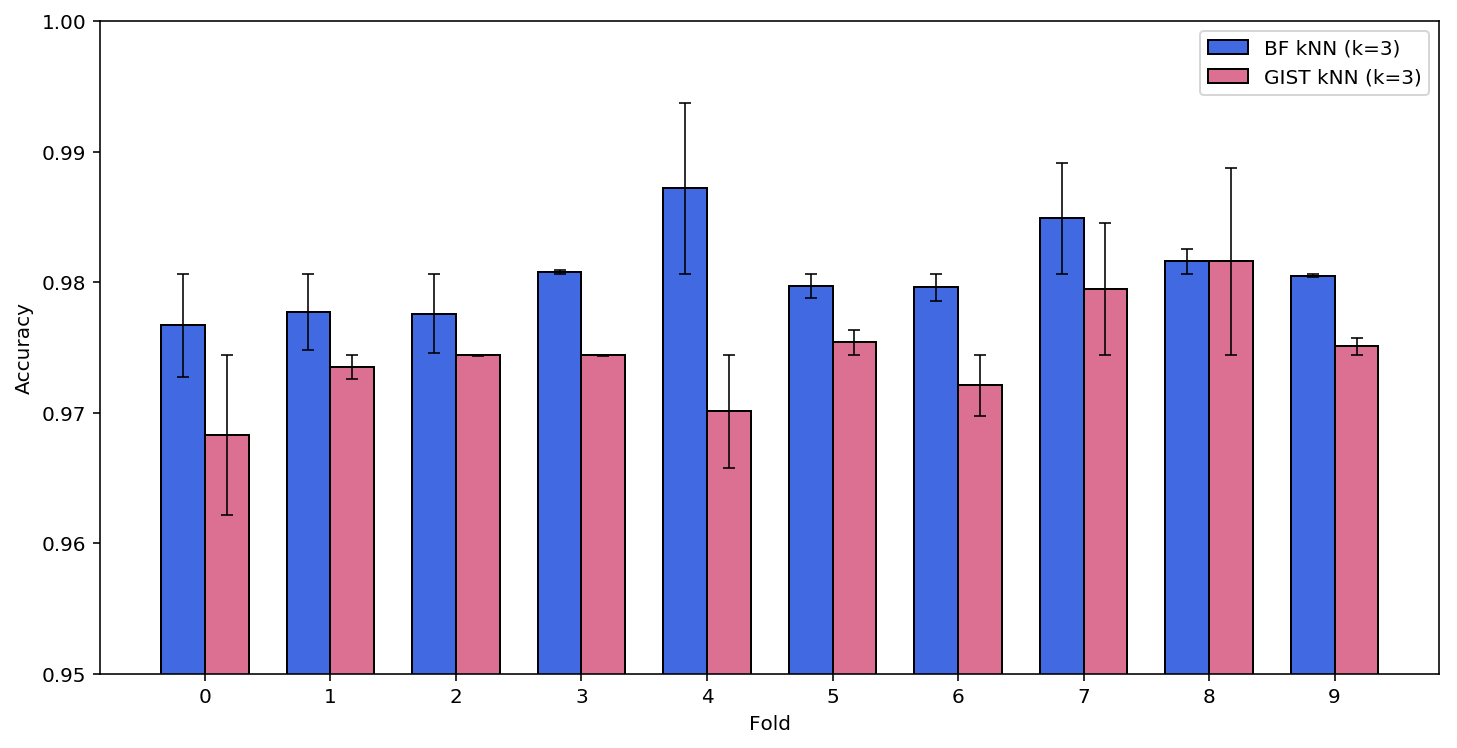

In [13]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax = plt.subplot()
error_kw = {'capsize': 3, 'capthick': 0.8, 'ecolor': 'black', 'lw' : 0.8}

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

DCNNkNNk3std = np.absolute(np.array(DCNNkNNk3acc)-np.mean(DCNNkNNk3acc))
rects1 = ax.bar(ind, DCNNkNNk3acc, width, color='royalblue', edgecolor='black', yerr=DCNNkNNk3std, error_kw=error_kw)

GISTkNNk3std = np.absolute(np.array(GISTkNNk3acc)-np.mean(GISTkNNk3acc))
rects2 = ax.bar(ind + width, GISTkNNk3acc, width, color='palevioletred', edgecolor='black', yerr=GISTkNNk3std, error_kw=error_kw)

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Fold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ind)

ax.legend((rects1[0], rects2[0]), ('BF kNN (k=3)', 'GIST kNN (k=3)'))

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.95,1.0))
plt.show()

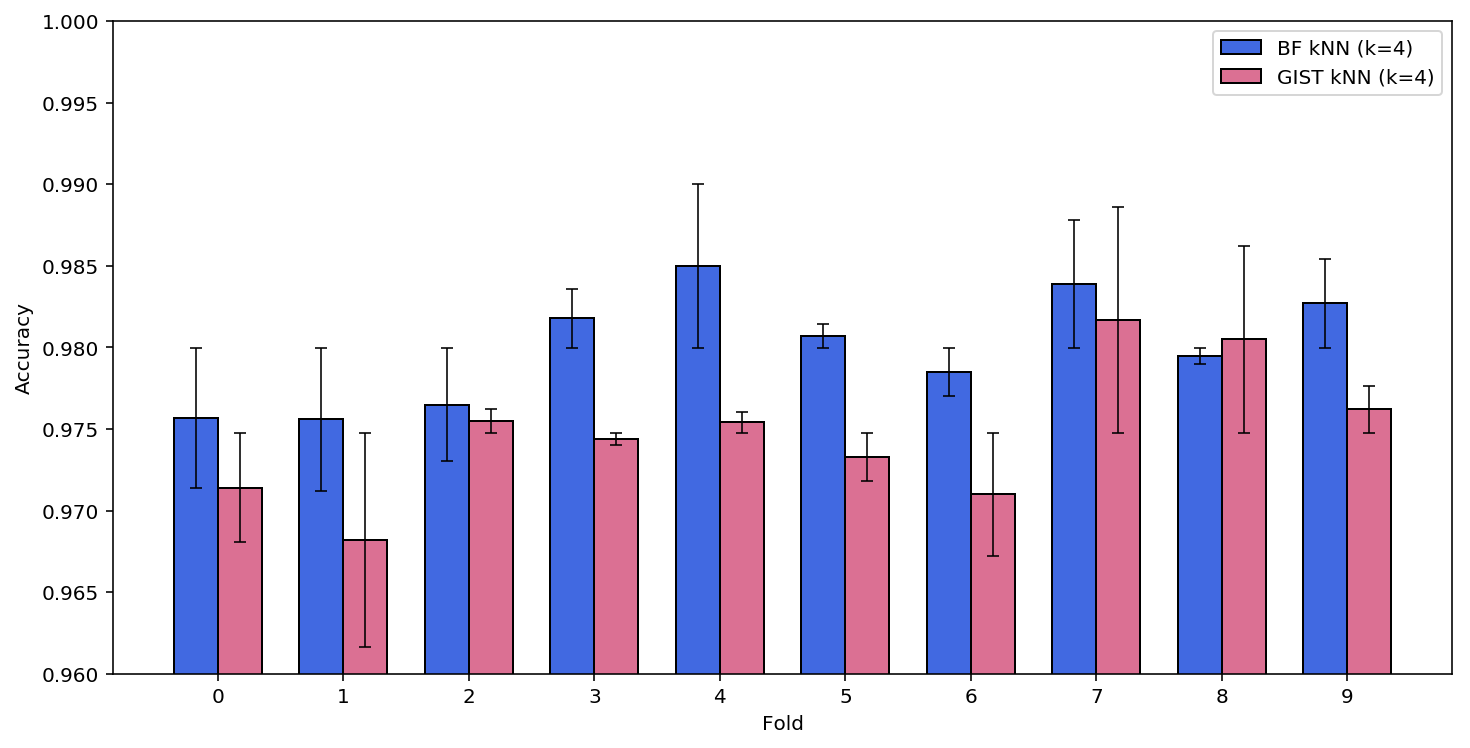

In [14]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax = plt.subplot()
error_kw = {'capsize': 3, 'capthick': 0.8, 'ecolor': 'black', 'lw': 0.8}

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

DCNNkNNk4std = np.absolute(np.array(DCNNkNNk4acc)-np.mean(DCNNkNNk4acc))
rects1 = ax.bar(ind, DCNNkNNk4acc, width, color='royalblue', edgecolor='black', yerr=DCNNkNNk4std, error_kw=error_kw)

GISTkNNk4std = np.absolute(np.array(GISTkNNk4acc)-np.mean(GISTkNNk4acc))
rects2 = ax.bar(ind + width, GISTkNNk4acc, width, color='palevioletred', edgecolor='black', yerr=GISTkNNk4std, error_kw=error_kw)

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Fold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ind)

ax.legend((rects1[0], rects2[0]), ('BF kNN (k=4)', 'GIST kNN (k=4)'))

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.96,1.0))
plt.show()

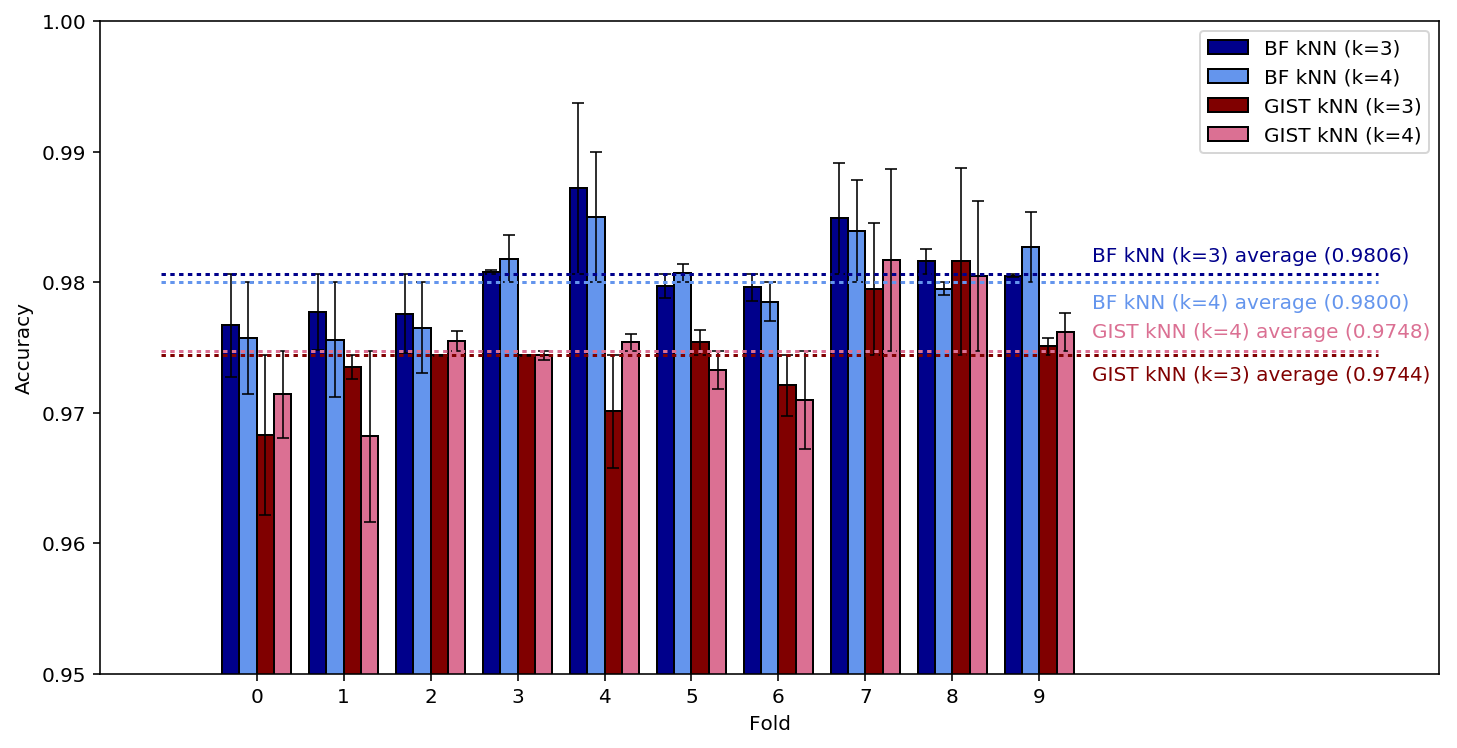

In [15]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax = plt.subplot()
error_kw = {'capsize': 3, 'capthick': 0.8, 'ecolor': 'black', 'lw' : 0.8}
lstart = -1
lend = 13
ls = ":"

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

DCNNkNNk3std = np.absolute(np.array(DCNNkNNk3acc)-np.mean(DCNNkNNk3acc))
rects1 = ax.bar(ind-width, DCNNkNNk3acc, width, color='darkblue', edgecolor='black', yerr=DCNNkNNk3std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(DCNNkNNk3acc),np.mean(DCNNkNNk3acc)], color='darkblue', linestyle=ls)
plt.text(lend-3.3, np.mean(DCNNkNNk3acc)+0.001, 'BF kNN (k=3) average (%.4f)' %(np.mean(DCNNkNNk3acc)), color='darkblue')

DCNNkNNk4std = np.absolute(np.array(DCNNkNNk4acc)-np.mean(DCNNkNNk4acc))
rects2 = ax.bar(ind, DCNNkNNk4acc, width, color='cornflowerblue', edgecolor='black', yerr=DCNNkNNk4std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(DCNNkNNk4acc),np.mean(DCNNkNNk4acc)], color='cornflowerblue', linestyle=ls)
plt.text(lend-3.3, np.mean(DCNNkNNk4acc)-0.002, 'BF kNN (k=4) average (%.4f)' %(np.mean(DCNNkNNk4acc)), color='cornflowerblue')

GISTkNNk3std = np.absolute(np.array(GISTkNNk3acc)-np.mean(GISTkNNk3acc))
rects3 = ax.bar(ind+width, GISTkNNk3acc, width, color='maroon', edgecolor='black', yerr=GISTkNNk3std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(GISTkNNk3acc),np.mean(GISTkNNk3acc)], color='maroon', linestyle=ls)
plt.text(lend-3.3, np.mean(GISTkNNk3acc)-0.002, 'GIST kNN (k=3) average (%.4f)' %(np.mean(GISTkNNk3acc)), color='maroon')

GISTkNNk4std = np.absolute(np.array(GISTkNNk4acc)-np.mean(GISTkNNk4acc))
rects4 = ax.bar(ind+2*width, GISTkNNk4acc, width, color='palevioletred', edgecolor='black', yerr=GISTkNNk4std, error_kw=error_kw)
ax.plot([lstart, lend], [np.mean(GISTkNNk4acc),np.mean(GISTkNNk4acc)], color='palevioletred', linestyle=ls)
plt.text(lend-3.3, np.mean(GISTkNNk4acc)+0.001, 'GIST kNN (k=4) average (%.4f)' %(np.mean(GISTkNNk4acc)), color='palevioletred')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Fold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ind)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), [accdict2[index].keys()[0] for index in accdict2.keys()])

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.95,1.0))
plt.show()

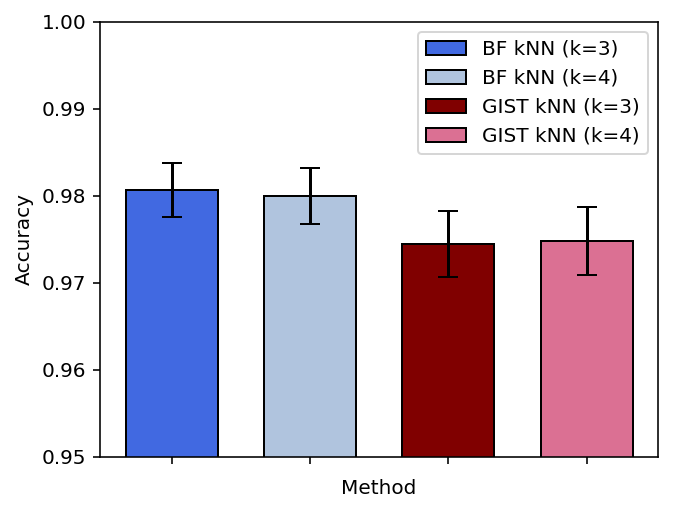

In [16]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
ax = plt.subplot()
error_kw = {'capsize': 5, 'capthick': 1, 'ecolor': 'black'}

N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.1       # the width of the bars

DCNNkNNk3mean = np.mean(DCNNkNNk3acc)
DCNNkNNk3std = np.std(DCNNkNNk3acc)
rects1 = ax.bar(ind, DCNNkNNk3mean, width, color='royalblue', edgecolor='black', yerr=DCNNkNNk3std, error_kw=error_kw)

DCNNkNNk4mean = np.mean(DCNNkNNk4acc)
DCNNkNNk4std = np.std(DCNNkNNk4acc)
rects2 = ax.bar(ind+1.5*width, DCNNkNNk4mean, width, color='lightsteelblue', edgecolor='black', yerr=DCNNkNNk4std, error_kw=error_kw)

GISTkNNk3mean = np.mean(GISTkNNk3acc)
GISTkNNk3std = np.std(GISTkNNk3acc)
rects3 = ax.bar(ind+3*width, GISTkNNk3mean, width, color='maroon', edgecolor='black', yerr=GISTkNNk3std, error_kw=error_kw)

GISTkNNk4mean = np.mean(GISTkNNk4acc)
GISTkNNk4std = np.std(GISTkNNk4acc)
rects4 = ax.bar(ind+4.5*width, GISTkNNk4mean, width, color='palevioletred', edgecolor='black', yerr=GISTkNNk4std, error_kw=error_kw)

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xlabel('Method')
ax.set_xticks([ind, ind+1.5*width, ind+3*width, ind+4.5*width])
#ax.set_xticklabels([accdict2[index].keys()[0] for index in accdict2.keys()], rotation=90)
ax.set_xticklabels([])

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), [accdict2[index].keys()[0] for index in accdict2.keys()])
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.95,1.0))
plt.show()

In [17]:
accdict3 = {}

DCNNkNNk3acc = [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]
GISTkNNk3acc = [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]

accdict3 = {0: {'BN kNN (k=3)': DCNNkNNk3acc},
            1: {'GIST kNN (k=3)': GISTkNNk3acc}}

In [18]:
for i in accdict3.keys():
    print(accdict3[i])

{'BN kNN (k=3)': [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]}
{'GIST kNN (k=3)': [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]}


In [19]:
for i in accdict3.keys():
    print("%s average: %.4f (+-%.4f)" %(accdict3[i].keys()[0],np.mean(accdict3[i].values()[0]),np.std(accdict3[i].values()[0])))

BN kNN (k=3) average: 0.9806 (+-0.0031)
GIST kNN (k=3) average: 0.9744 (+-0.0038)


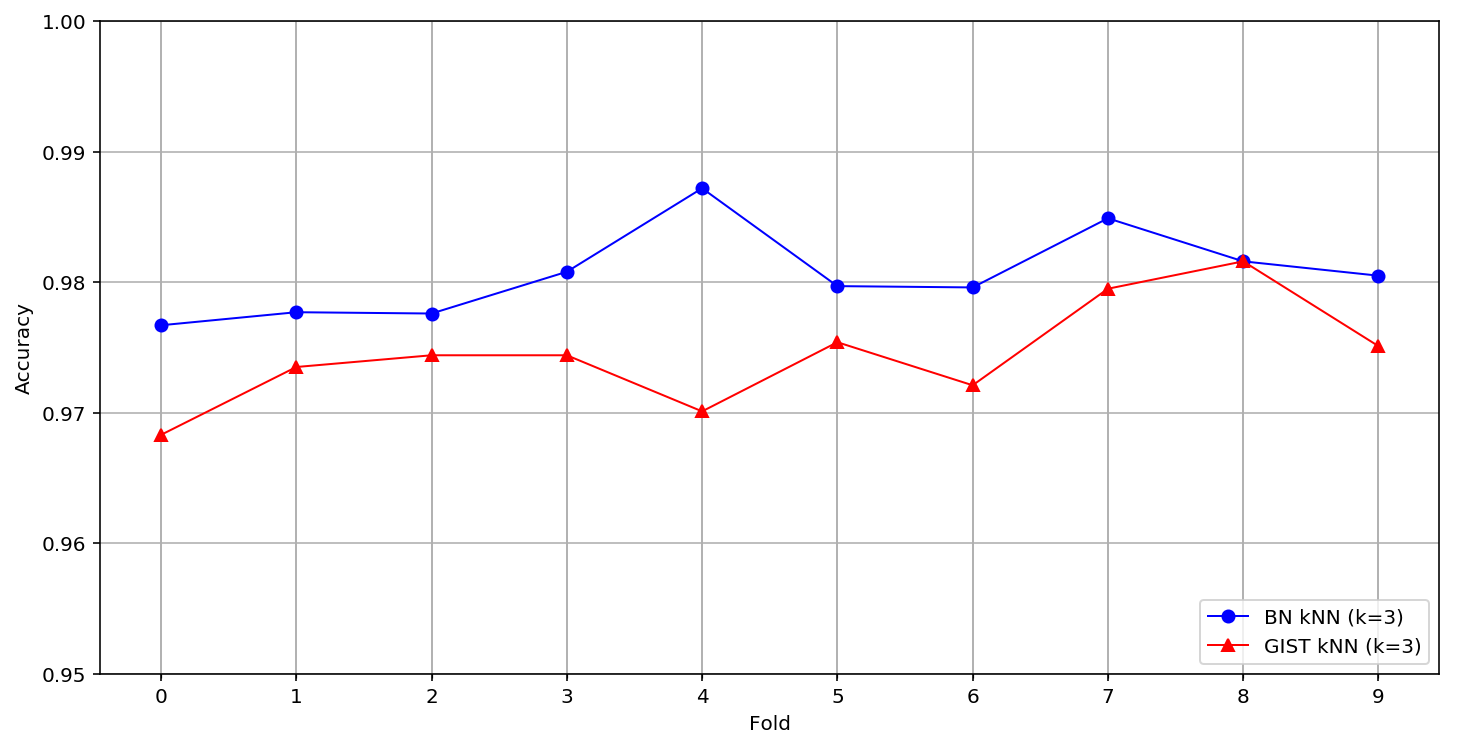

In [20]:
plot_acc(accdict3)

In [21]:
accdict4 = {}

DCNNkNNk4acc = [0.9757, 0.9756, 0.9765, 0.9818, 0.9850, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]
GISTkNNk4acc = [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.9710, 0.9817, 0.9805, 0.9762]

accdict4 = {0: {'BN kNN (k=4)': DCNNkNNk4acc},
            1: {'GIST kNN (k=4)': GISTkNNk4acc}}

In [22]:
for i in accdict4.keys():
    print(accdict4[i])

{'BN kNN (k=4)': [0.9757, 0.9756, 0.9765, 0.9818, 0.985, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]}
{'GIST kNN (k=4)': [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.971, 0.9817, 0.9805, 0.9762]}


In [23]:
for i in accdict4.keys():
    print("%s average: %.4f (+-%.4f)" %(accdict4[i].keys()[0],np.mean(accdict4[i].values()[0]),np.std(accdict4[i].values()[0])))

BN kNN (k=4) average: 0.9800 (+-0.0032)
GIST kNN (k=4) average: 0.9748 (+-0.0039)


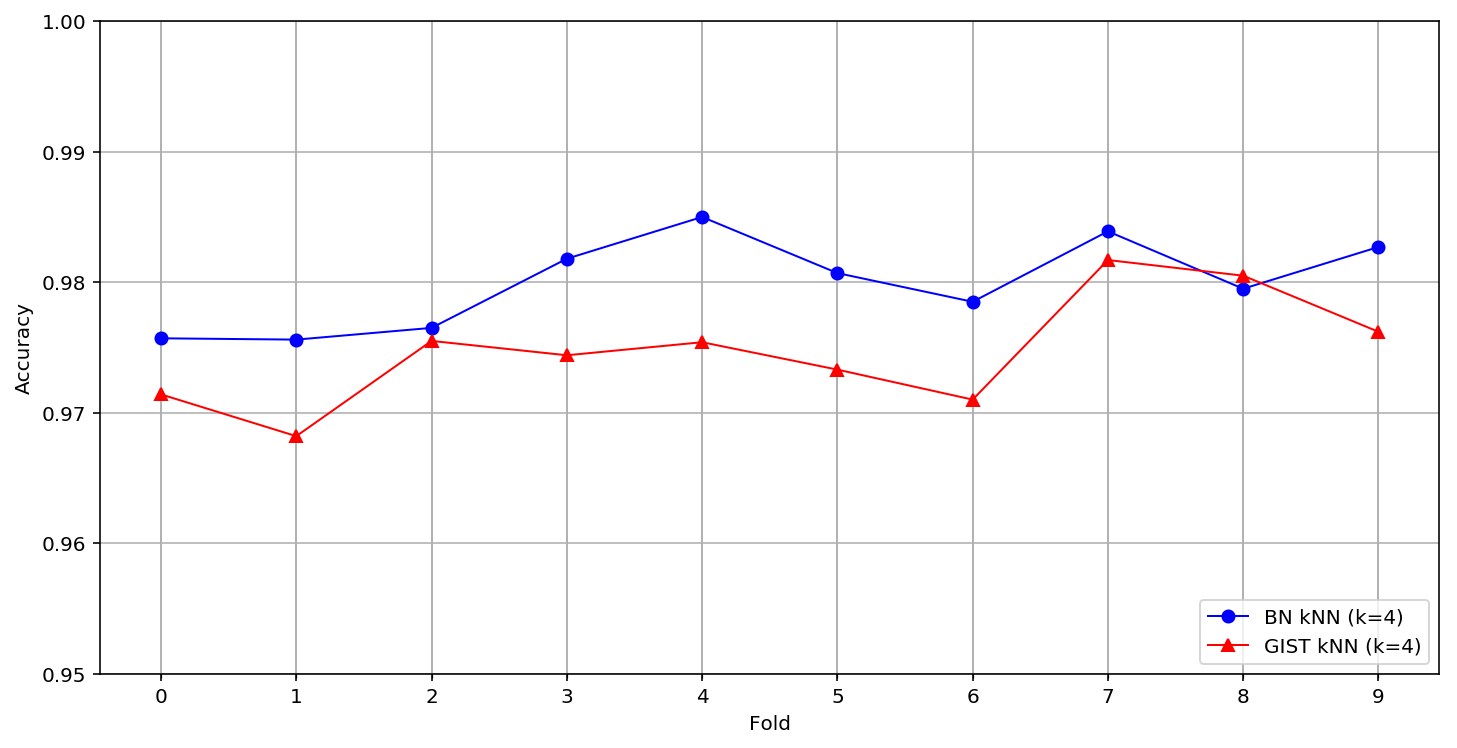

In [24]:
plot_acc(accdict4)